In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
import numpy as np

start_value1= 1e-04
end_value1 = 8e-04


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)

csv_file = 'combinations.csv'
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

print(array)


[0.0001     0.00012414 0.00014828 0.00017241 0.00019655 0.00022069
 0.00024483 0.00026897 0.0002931  0.00031724 0.00034138 0.00036552
 0.00038966 0.00041379 0.00043793 0.00046207 0.00048621 0.00051034
 0.00053448 0.00055862 0.00058276 0.0006069  0.00063103 0.00065517
 0.00067931 0.00070345 0.00072759 0.00075172 0.00077586 0.0008    ]


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns=t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.1,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.2,7.002980,7.002980,7.002974,7.002932,7.002789,7.002458,7.001847,7.000879,6.999498,6.997670,...,6.952656,6.947175,6.941609,6.935984,6.930324,6.924651,6.918983,6.913337,6.907729,6.902171
0.3,7.002980,7.002979,7.002920,7.002608,7.001717,6.999901,6.996879,6.992472,6.986611,6.979312,...,6.840077,6.825412,6.810828,6.796383,6.782125,6.768095,6.754327,6.740850,6.727684,6.714847
0.4,7.002980,7.002965,7.002682,7.001479,6.998521,6.993104,6.984807,6.973503,6.959298,6.942444,...,6.676446,6.651473,6.627022,6.603163,6.579951,6.557424,6.535613,6.514535,6.494202,6.474615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,3.696863,2.711031,1.946048,1.396251,1.019386,0.765431,0.593050,0.473456,0.388217,0.325789,...,0.121223,0.117111,0.113782,0.111099,0.108972,0.107388,0.106104,0.105067,0.104238,0.103578
49.7,3.693159,2.707206,1.942593,1.393401,1.017152,0.763712,0.591720,0.472413,0.387382,0.325109,...,0.121107,0.117013,0.113700,0.111030,0.108920,0.107344,0.106067,0.105036,0.104212,0.103557
49.8,3.689461,2.703389,1.939147,1.390560,1.014926,0.761999,0.590397,0.471373,0.386552,0.324432,...,0.120993,0.116916,0.113618,0.110961,0.108868,0.107300,0.106030,0.105006,0.104187,0.103536
49.9,3.685767,2.699579,1.935710,1.387728,1.012709,0.760293,0.589078,0.470339,0.385725,0.323759,...,0.120879,0.116819,0.113536,0.110893,0.108816,0.107256,0.105993,0.104975,0.104162,0.103516


(0.0, 7.5)

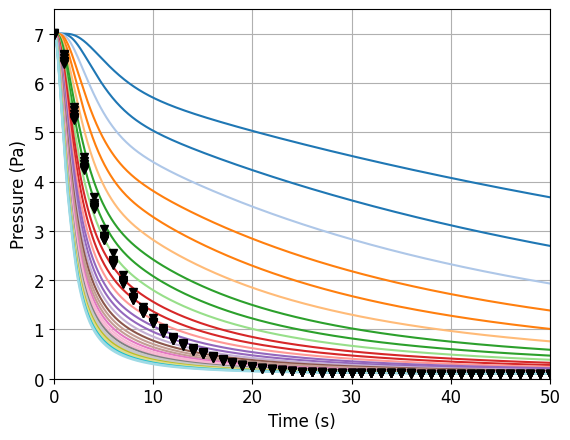

In [3]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT1_1000_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_3']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_4']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_5']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_6']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_7']/1e6, color = 'k', marker = 'v', linestyle = '')

ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 7.5)

minimum RMSE position:  10
minimum particle_diameter:  particle_diameter_1    0.000341
Name: 10, dtype: float64


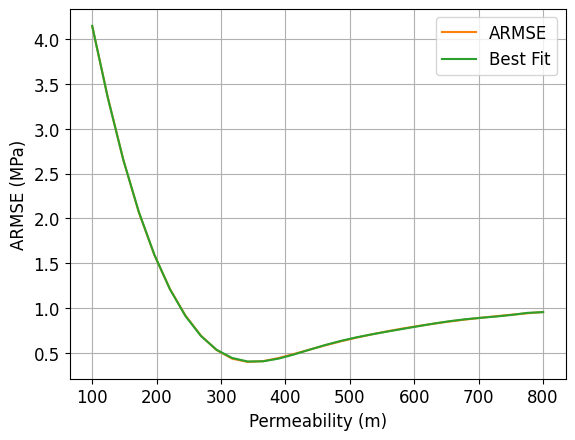

In [4]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_1000_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)


parameters = pd.read_csv('combinations.csv')*1e6
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability (m)', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

minimum RMSE position:  11
minimum particle_diameter:  particle_diameter_1    0.000366
Name: 11, dtype: float64


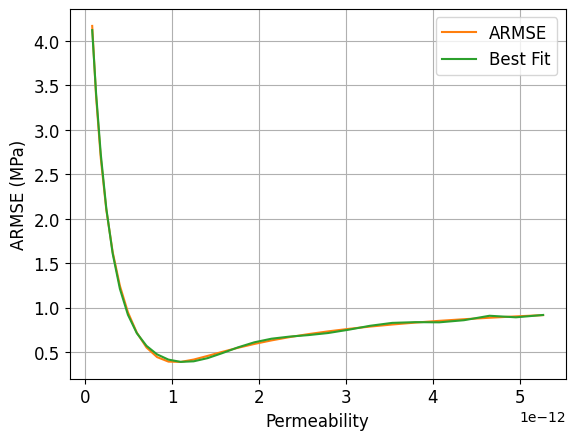

In [5]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_1000_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)

parameters = pd.read_csv('combinations.csv')**2/150*0.001/(1-0.1)**2
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


CT1_1 = pd.read_csv('model_pellets_1.csv')
CT1_2 = pd.read_csv('model_pellets_2.csv')
plt.plot(CT1_1['time'], CT1_1['inlet-p'], label = 'CFD CT1')
plt.plot(CT1_2['time'], CT1_2['inlet-p'], label = 'CFD TT2')
plt.plot(data20['time'], data20['CT1_600_1'], label = 'exp CT1')
plt.plot(data20['time'], data20['CT1_600_2'], label = 'exp CT2')
plt.grid()
plt.xlim(0, 50)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'model_pellets_1.csv'